#**Jewelry Price Optimization Using Machine Learning**

##**1. Introduction & Business Problem**

**Business Context**

Gemineye Emporium, a boutique jewelry store, has expanded from a small-scale business to a large-scale jewelry manufacturing and trading company. While this expansion is great for business, it has introduced new challenges, particularly in pricing strategies.

Previously, pricing was straightforward and relied on expert opinions, but now, with increased complexity in logistics, material sourcing, and manufacturing, Gemineye struggles to:

- __Determine optimal prices__ without inflating costs.
- __Remain competitive__ while ensuring profitability.
- __Account for market trends__ that affect demand and pricing.

**Understanding Pricing Challenges**:

Gemineye Emporium faces pricing challenges due to its rapid expansion. The company must balance profitability and competitiveness while ensuring fair pricing.
The Challenges include:
1. Market Dynamics – Consumer preferences, seasonal trends.
2. Competitive Pricing – Offering the best price without losing sales.
3. Cost Management – Managing material, production, and logistics costs.

To address this:
**Solution Approach**
To solve this, we propose using Machine Learning (ML) to develop price optimization models that:

1. __Predict optimal jewelry prices__ based on product attributes.
2. __Ensure business profitability__ while keeping prices competitive.
3. __Analyze market dynamics__ and pricing trends.
4. __Enhance model explainability__ to ensure transparency in price predictions.

To address this:
Business needs an AI-powered pricing strategy to maintain a competitive edge.

- **Objective**: Build an ML model to predict optimal jewelry prices.
- **Stakeholder Collaboration:** Work with sales, finance, and marketing teams to define key business constraints and requirements.
- **Desired Outcome**: A dynamic pricing system to optimize profitability, affordability, and market trends.

AI must ensure:
- Profitability: Maximize revenue.
- Affordability: Keep customers satisfied.
- Explainability: Pricing must be transparent to stakeholders.

##**2. Project Methodology**
This project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** methodology, o optimize jewelry pricing using machine learning, which consists of the following phases:

1. __Introduction & Business Problem__: A summary of why the project is needed.
2. __Methodology (CRISP-DM)__: Explanation of how the project is structured.
3. __Tools & Libraries__ Brief descriptions of the Python libraries used.
4. __Business Understanding__: Identifying the pricing challenges faced by Gemineye Emporium.
5. __Exploratory Data Analysis (EDA)/Data Understanding:__ Loading and analyzing the dataset to extract useful insights.
6. __Data Preparation/Feature Selection & Engineering__: Cleaning and processing data for machine learning ML models.
7. __Model Development/Modeling__: Implementing cross-validation for better model generalization. Training and applying predictive models to estimate jewelry prices.
8. __Model Evaluation & Explanation__: Assessing the model's accuracy and explainability, evaluating models with MAE, MSE, RMSE, and R² metrics.
9. __Hyperparameter Tuning__: Performing GridSearchCV to fine-tune the models for optimal performance.
10. __Experiment Tracking with MLflow__:
- Logging experiments, hyperparameter tuning, and model iterations.
- Comparing different models for reproducibility.
11. __Deployment Strategy__: Saving and using the trained model for real-time pricing. Deploying the best model using Streamlit, FastAPI, Render, Heroku, and GitHub.
12. __Insights and Recommendations__: Generating a comprehensive report with actionable insights for pricing strategy refinement


__Note__: This structured approach ensures clarity, scalability, and usability of the Jewelry Price Optimization model.

##**3. Tools & Libraries Used**
The following Python libraries are used:

- __NumPy__ – Numerical computations.
- __Pandas__ – Data manipulation and processing.
- __Matplotlib & Seaborn__ – Data visualization.
- __Scikit-learn__ – Machine learning model development.
- __RAPIDS (CuML)__ – GPU-accelerated machine learning for large datasets.
- __Mlflow__: For Experiment Tracking


##**Exploratory Data Analysis (EDA)**
**Import Required Libraries**

In [84]:
!pip install mlflow

In [85]:
!pip install streamlit
!pip install pyngrok
!pip install fastapi
!pip install uvicorn
!pip install render
!pip install pyngrok
!pip install catboost

In [86]:
!pip install xgboost

##**Data Collection & Preprocessing**

Cleaning and preprocessing the dataset to remove inconsistencies and prepare it for model training

** Import Required Libraries**

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures
from sklearn.linear_model import BayesianRidge # Import BayesianRidge
from sklearn.linear_model import HuberRegressor # Import HuberRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# Experiment Tracking with MLflow
import mlflow
import mlflow.sklearn

# Set plot theme and styles
sns.set()
sns.set_style("darkgrid")


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
import mlflow
import mlflow.sklearn

# Set plot theme and styles
sns.set()
sns.set_style("darkgrid")


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [88]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load & Inspect Data**

In [89]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amdari_Work_Exp_Internship_Cohort/Jewellery_Price_Optimization_with_ML-Pricing-Data-to-Refine-Pricing-Strategies/Jewelry_Dataset.csv")

# Display first five rows
data.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


**Note**: Data Does not look nice and interesting, hence, there is a need to look throug the data dictionary:

This will guide the fixing of the column names for the data set.

In [90]:
# Load the data dcitionary
dict_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Amdari_Work_Exp_Internship_Cohort/Jewellery_Price_Optimization_with_ML-Pricing-Data-to-Refine-Pricing-Strategies/Jewelry_Data_Dictionary.xlsx")
dict_data

,Column name,Column description
0,Order datetime,Date product was ordered
1,Order ID,Identifier for order
2,Purchased product ID,Identifier for product ordered
3,Quantity of SKU in the order,Amount of stock keeping unit ordered
4,Category ID,Jewelry category identifier
5,Category alias,Jewelry category
6,Brand ID,Brand identifier
7,Price in USD,Jewelry price
8,User ID,User identifier
9,Product gender (for male/female),Target gender for product


**Data Preprocessing**

In [91]:
# Extract and fix column names as follows
data.columns = ["Order_datetime",
                "Order_ID",
                "Product_ID",
                "SKU_Quantity",
                "Category_ID",
                "Category",
                "Brand_ID",
                "Price_USD",
                "User_ID",
                "Target_Gender",
                "Main_Color",
                "Main_Metal",
                "Main_Gem"

                ]

In [92]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


Column names fixed

In [93]:
data.shape

(95910, 13)

In [94]:
# Check missing values
data.isnull().sum() # This method allows a check on each data entry for missing values and sum all

,0
Order_datetime,0
Order_ID,0
Product_ID,0
SKU_Quantity,0
Category_ID,5352
Category,9933
Brand_ID,4785
Price_USD,5352
User_ID,5352
Target_Gender,48167




**Findings and Observations**:

- The dataset contains historical jewelry sales (order details, product information, and pricing data).

- There are missing values in some columns (e.g., Main_Gem, Target_Gender).

This is a considerable amount of missig values as compare to the total number of data i.e `95910`

- Some features need encoding.

##**Explortory Data Analysis (EDA)**

In [95]:
# Check for the feature cardinality and unique values
data.nunique()

,0
Order_datetime,74504
Order_ID,74759
Product_ID,9613
SKU_Quantity,1
Category_ID,25
Category,218
Brand_ID,2537
Price_USD,3166
User_ID,31079
Target_Gender,2


From the unique features within the dataset, we notice that `SKU_Quantity` is just a single value, while Target_Gender, Main_color, Main_Metal, Main_Gem, Can be identified as categorical variables

In [96]:
# Data Description
data.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


The data description shows the statistical summary for the data, Note that the statistical summary will be considered only on the `Price_USD`

In [97]:
# Check and show dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


The data information and structure is helping to guide how to encode the features.

In [98]:
# Check for duplicate values
num_duplcates = data.duplicated().sum()
print(f"Number of duplicate values: {num_duplcates}")

Number of duplicate values: 2589


In [99]:
# Check for duplicate values
num_duplicated = len(data[data.duplicated()])
print(f"Number of duplicate values: {num_duplicated}")

Number of duplicate values: 2589


Note: Total duplcated = `2589`, Need to remove all duplicated

In [100]:
# Feature with cardinality of 1 (invariant features)

#Extract the invariant features
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()
print(f"Invariant features: {invariant_features}")

Invariant features: ['SKU_Quantity']


In [101]:
# Check Distribution of Prices, guides the skewed distribution
data["Price_USD"].skew()

18.95906072625981

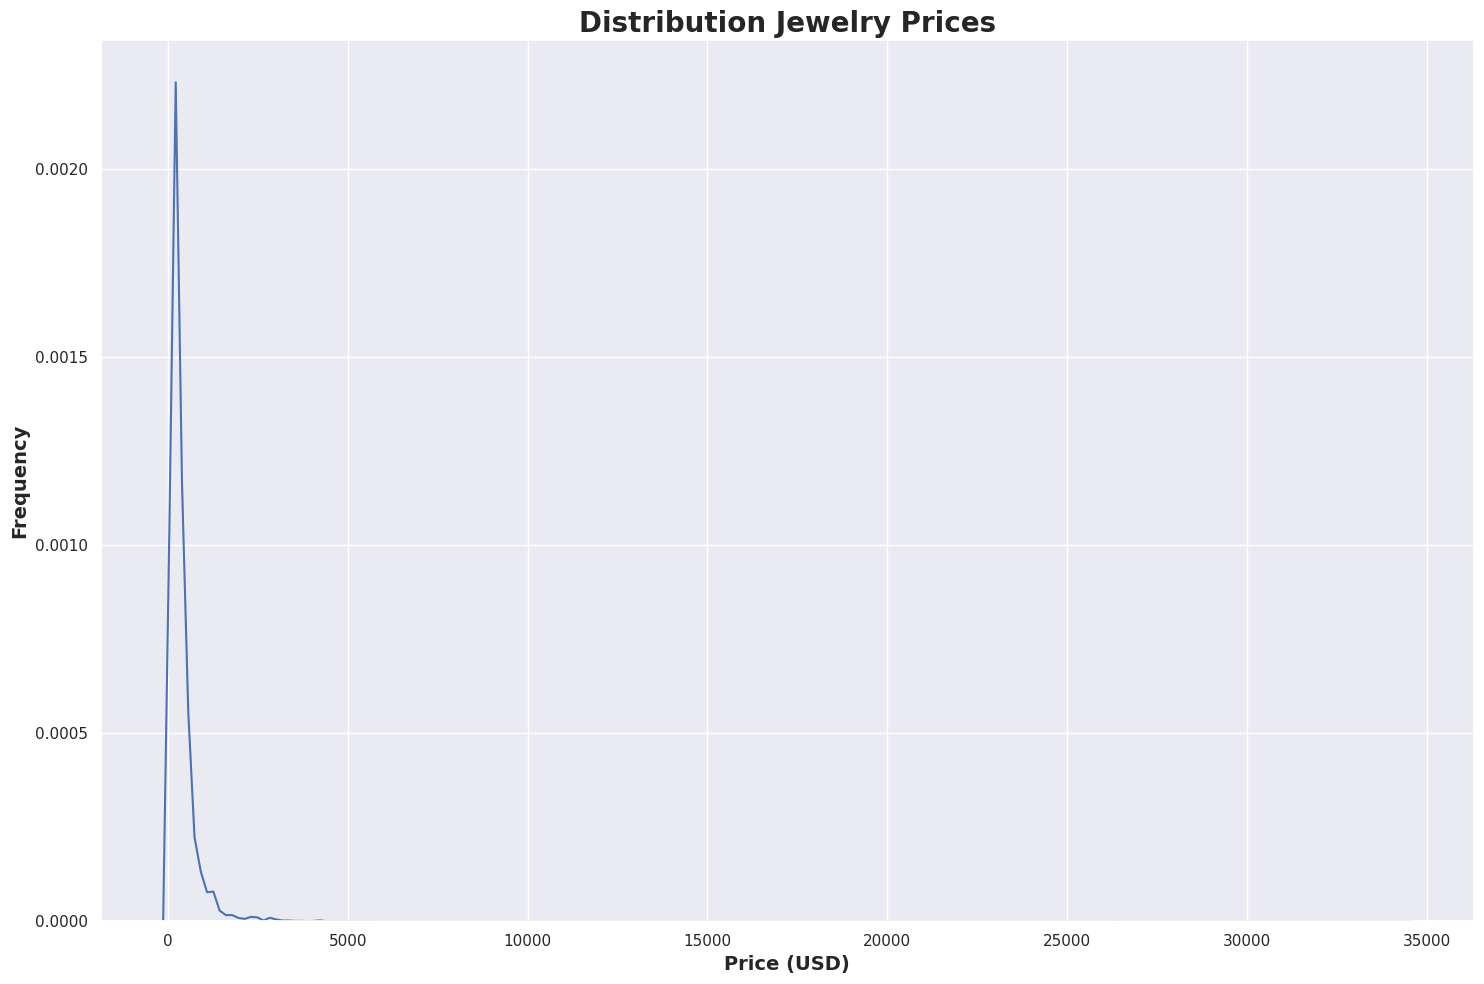

In [102]:
# Visualize the jewelry price distribution
plt.figure(figsize=(15, 10))
sns.kdeplot(data = data, x = "Price_USD")
plt.title("Distribution Jewelry Prices", fontsize = 20, fontweight = 'bold')
plt.xlabel("Price (USD)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Frequency", fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show(); plt.close()

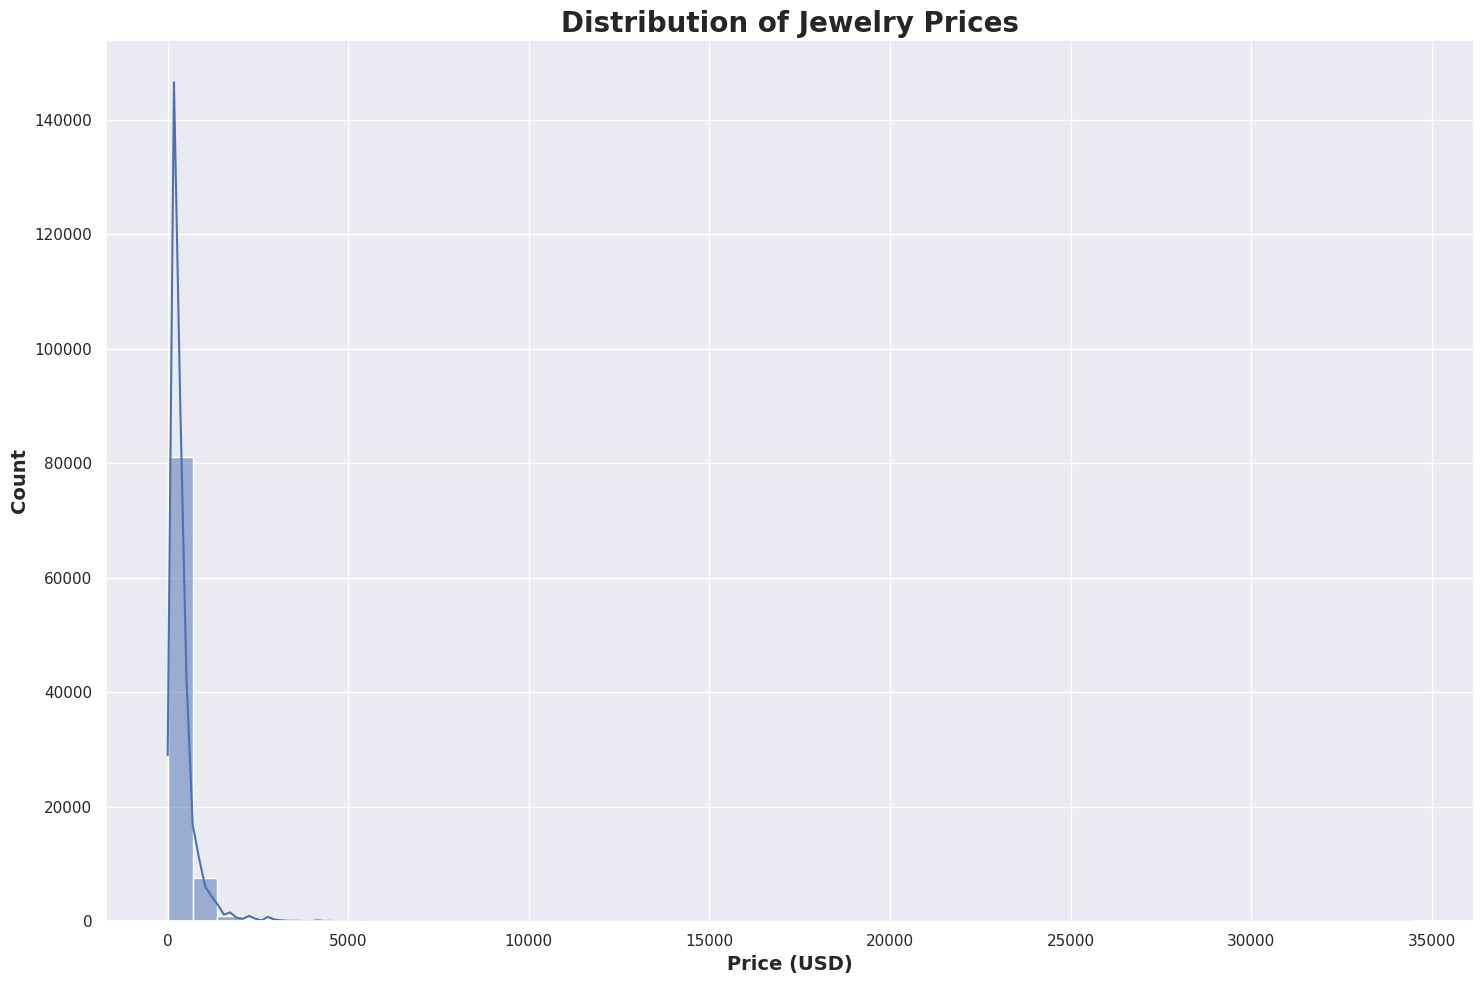

In [103]:
plt.figure(figsize=(15, 10))
sns.histplot(data["Price_USD"], bins=50, kde=True)
plt.title("Distribution of Jewelry Prices", fontsize = 20, fontweight = 'bold')
plt.xlabel("Price (USD)", fontsize = 14, fontweight = 'bold')
plt.ylabel("Count", fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show(); plt.close()

In [104]:
# Check for Kurtosis
data["Price_USD"].kurtosis()

1054.8979068506155

**Observation**:

- The plot shows a left skewed,  high and shape plot

- It has a high kurtosis.

**Jewleries** has so much to do with gender, Hence there is a target gender feature, we analyze based on gender.*

In [105]:
# Target Gender Analysis

# unique values and frequency of occurence
data["Target_Gender"].value_counts(normalize = True)

,proportion
Target_Gender,
f,0.992376
m,0.007624


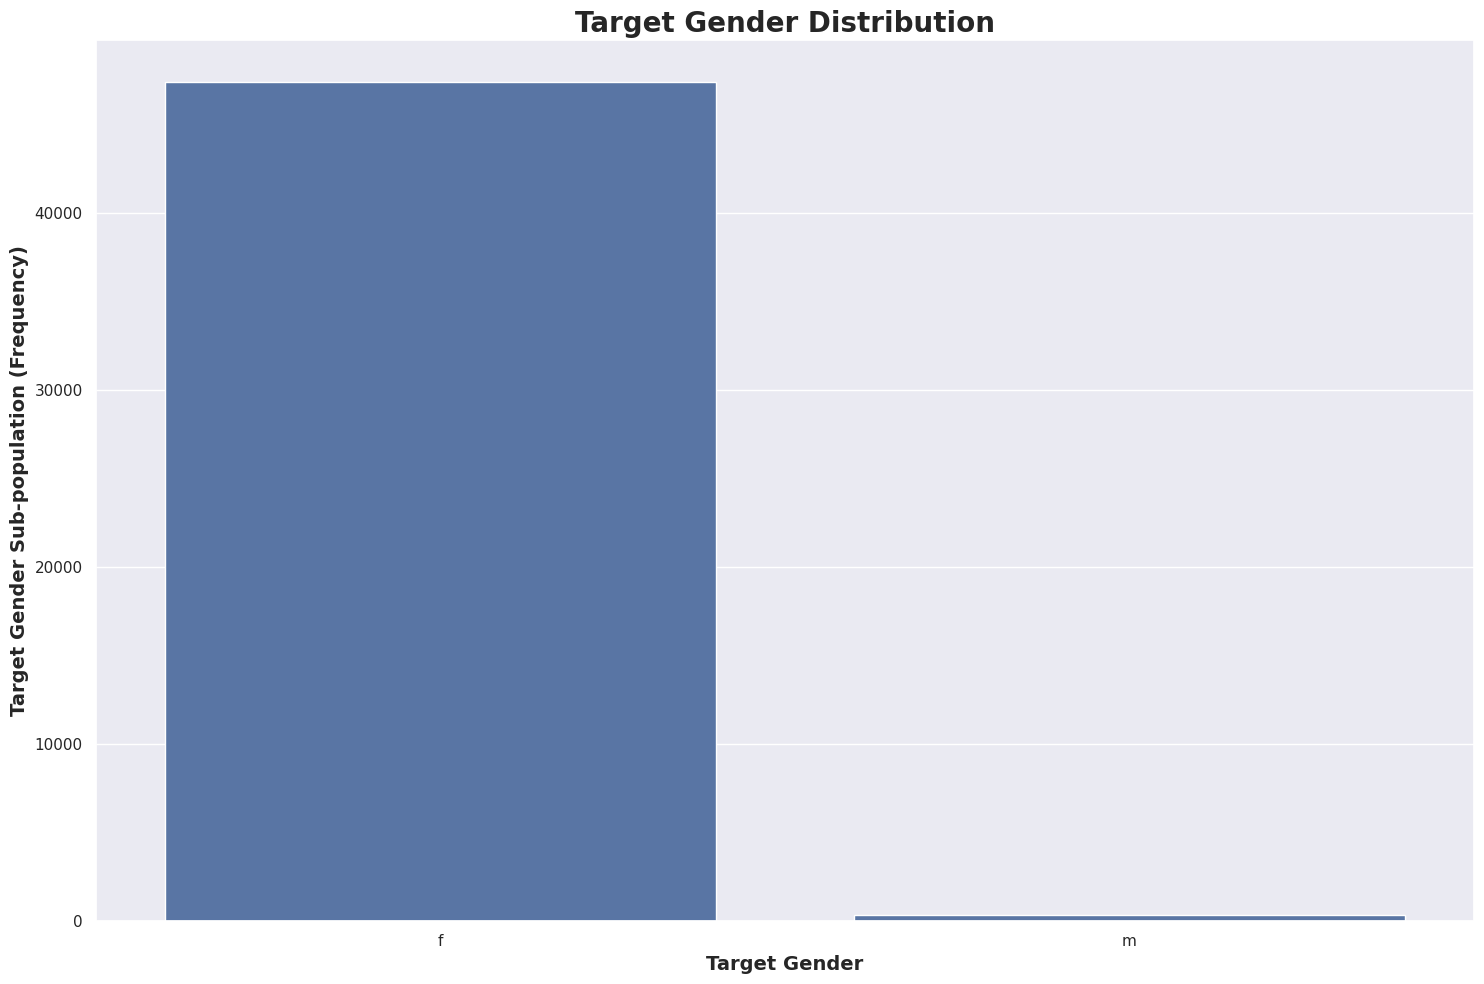

In [106]:
# Visualize target gender
plt.figure(figsize=(15, 10))
sns.countplot(data = data, x = "Target_Gender")
plt.title("Target Gender Distribution", fontsize = 20, fontweight = 'bold')
plt.xlabel("Target Gender", fontsize = 14, fontweight = 'bold')
plt.ylabel("Target Gender Sub-population (Frequency)", fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show(); plt.close()

Observation:
This Analsis distribution shows the Female Gender has higher frequency of use

Jewel Category Distribution

In [107]:
# Jewel Category
data["Category"].value_counts()

,count
Category,
jewelry.earring,29051
jewelry.ring,28300
jewelry.pendant,13088
jewelry.bracelet,6188
0.00,4392
...,...
626.58,1
13.42,1
2.88,1


In [108]:
# Get the unique category of jewelries
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

**Observation**: There is a need to eliminate categories that are not jewelries

In [109]:
# Extract actual categories
categories = data["Category"].unique().tolist()
categories = [x for x in categories if isinstance(x, str) and "jewelry" in x]
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [110]:
# Pick out data based on categories, ie filter out the correct categories
real_categories = data.loc[data["Category"].isin(categories)]
real_categories.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,NaN,red,gold,diamond


## Hypothesis test

We test for `Hypothesis`: To check and confirm for most missing values resulting due to the presence of wrong categories.


In [111]:
# Percentage of missing data
100 * data.isnull().sum()/len(data)

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,5.580231
Category,10.356584
Brand_ID,4.989052
Price_USD,5.580231
User_ID,5.580231
Target_Gender,50.221041


In [112]:
# Percentage of missing real_categories
100 * real_categories.isnull().sum()/len(real_categories)

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,0.000000
Category,0.000000
Brand_ID,4.309081
Price_USD,0.000000
User_ID,0.000000
Target_Gender,44.842029


Observation from the data, shows category is completely fixed, hence, a large part of missing values is due to the corruption observed is wrong categories

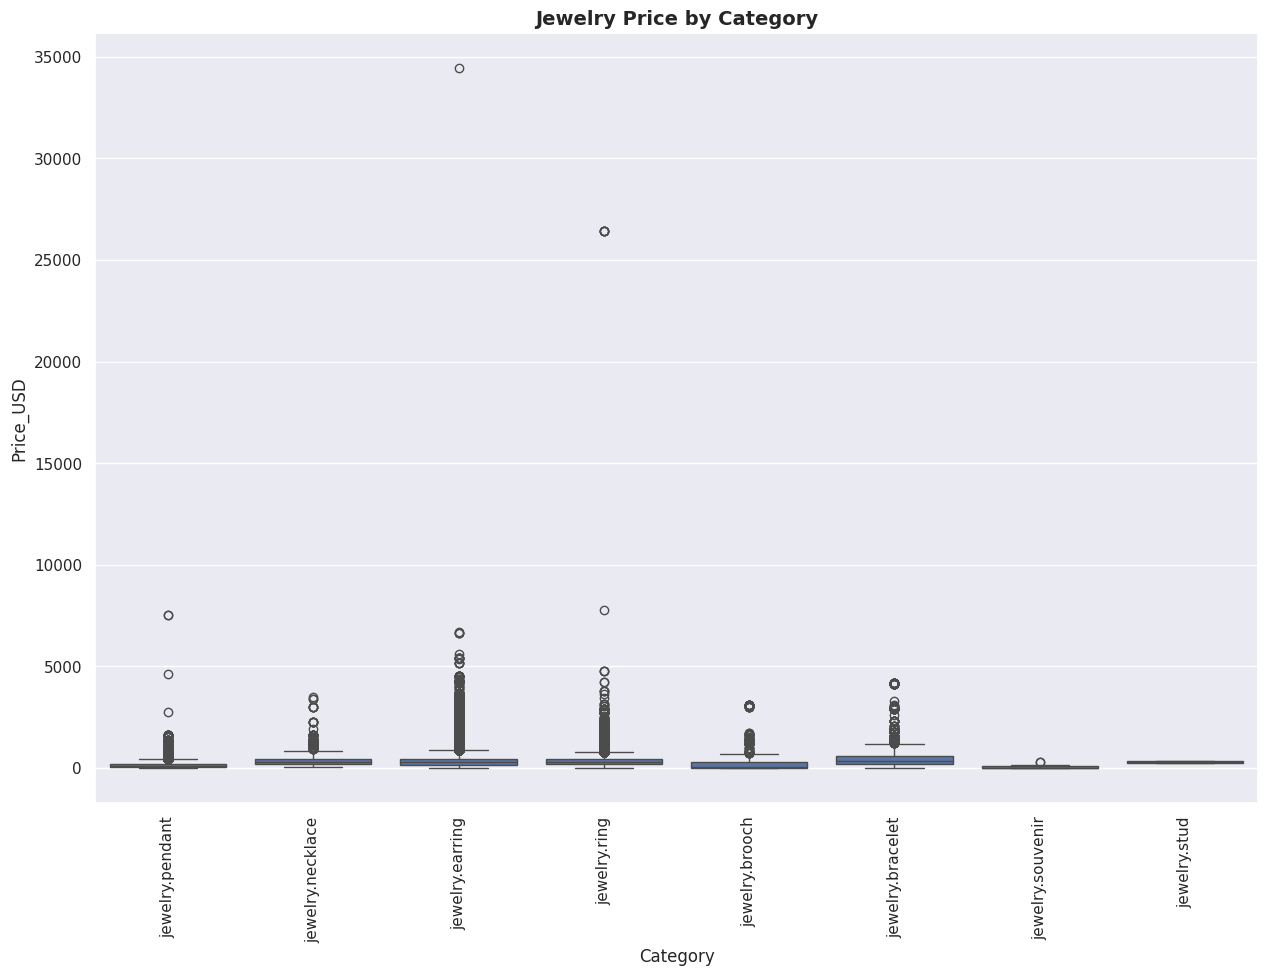

<Figure size 640x480 with 0 Axes>

In [113]:
# Create the box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x="Category", y="Price_USD", data=data[data['Category'].isin(categories)]) # Filter data based on categories
plt.xticks(rotation=90)
plt.title("Jewelry Price by Category", fontsize=14, fontweight='bold')
plt.show()

# Adjust layout to make sure everything fits nicely
plt.tight_layout()

# Display the chart
plt.show()
plt.close()

 **Key Observations**:
- Prices vary across categories.
- Some jewelry pieces are highly priced outliers.

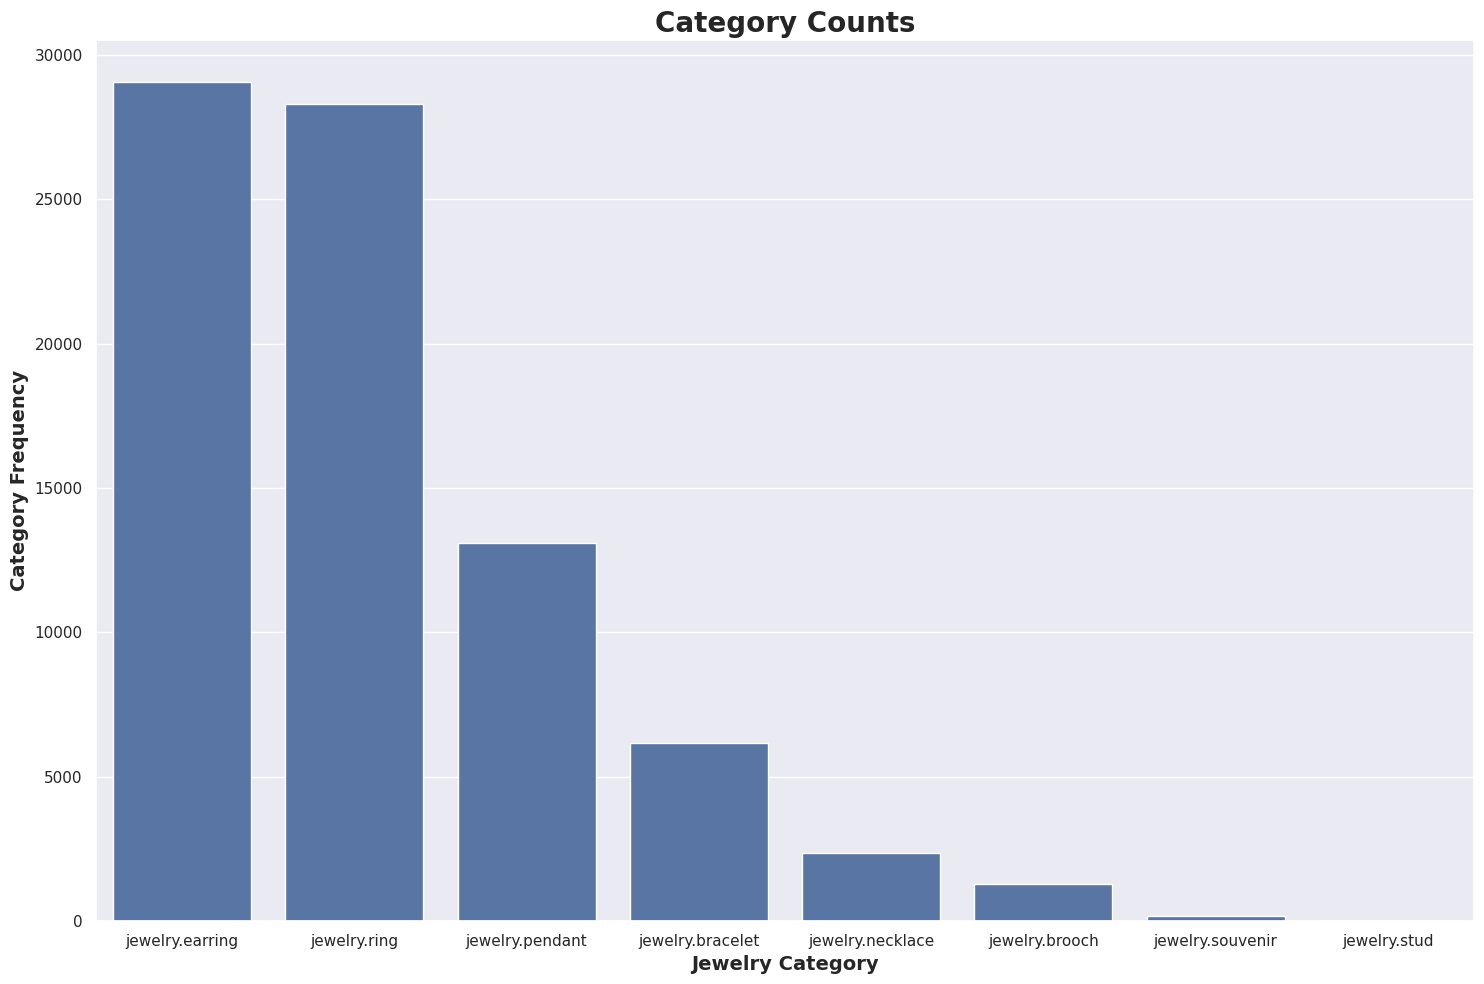

In [114]:
# Visualize a count plot to have idea on actual quantity
# Category Countplot

sorted_categories = real_categories["Category"].value_counts().index

plt.figure(figsize=(15, 10))
sns.countplot(data = real_categories, x = "Category", order=sorted_categories)

plt.title("Category Counts", fontsize = 20, fontweight = 'bold')
plt.xlabel("Jewelry Category", fontsize = 14, fontweight = 'bold')
plt.ylabel("Category Frequency", fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show(); plt.close()

Observation:
Earings and rings account for over 60 % of all category counts of jewery

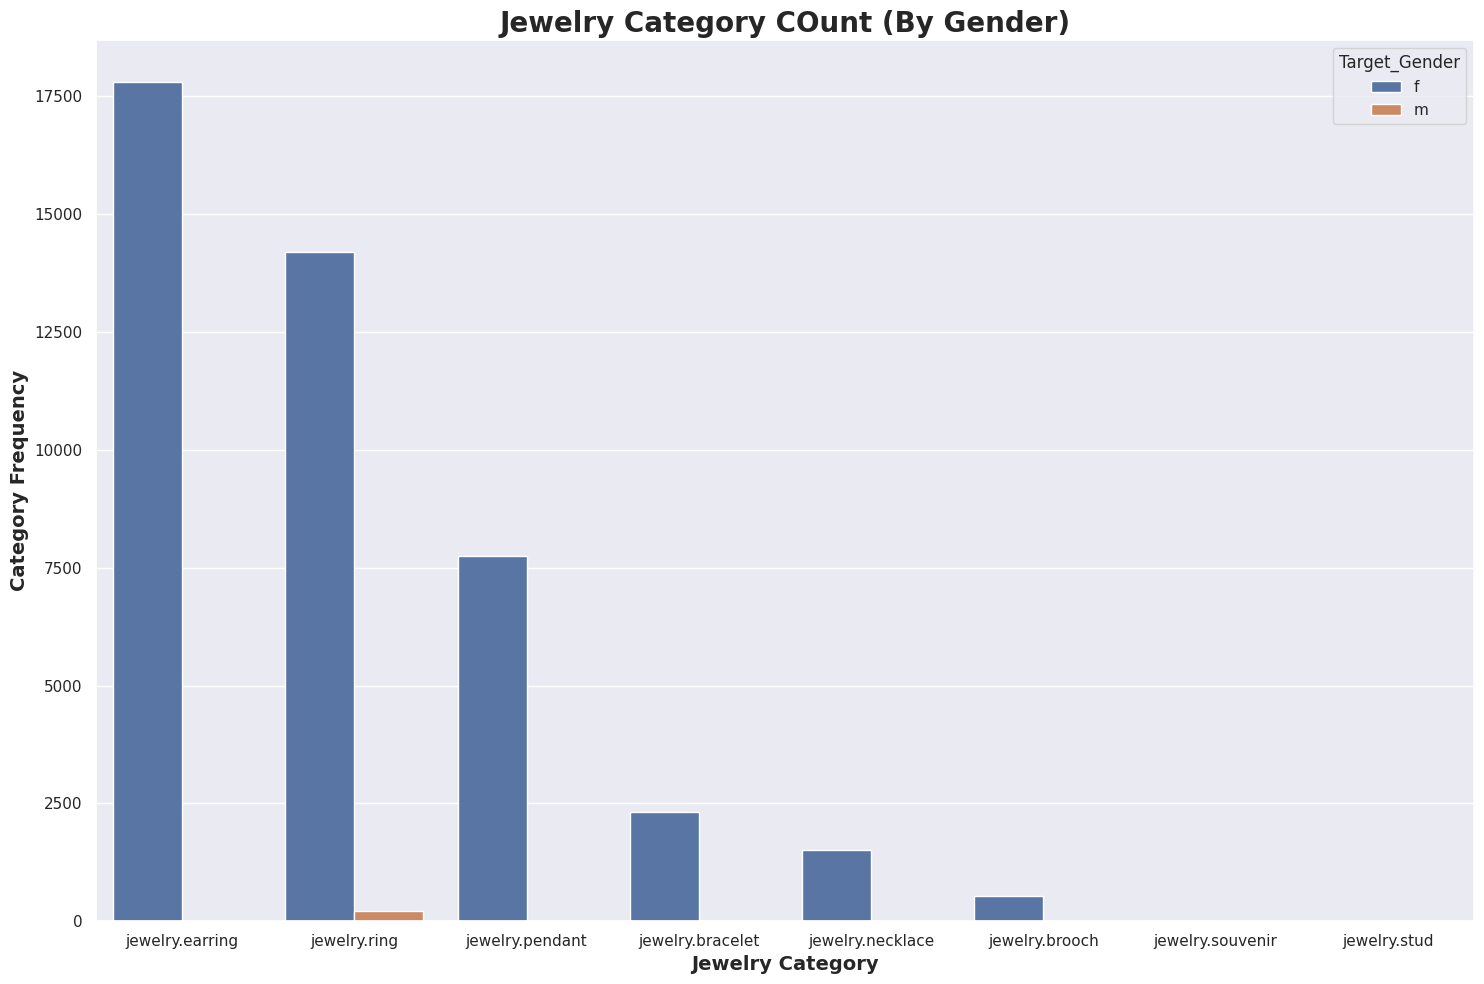

In [115]:
# Jewery Category by gender

sorted_categories = real_categories["Category"].value_counts().index

plt.figure(figsize=(15, 10))
sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender", order=sorted_categories)
plt.title("Jewelry Category COunt (By Gender)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Jewelry Category", fontsize = 14, fontweight = 'bold')
plt.ylabel("Category Frequency", fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show(); plt.close()

**Observation**:

The only jewelry category patronized by male gender is ring, Hence `Gemineye Emporium` can be encouraged to sale some other form of jewelries appealing to the male gender

In [116]:
# Gender Skew in Original Data set
data["Target_Gender"].value_counts(normalize = True)

,proportion
Target_Gender,
f,0.992376
m,0.007624


In [117]:
# Gender Skew in real_categories Data
real_categories["Target_Gender"].value_counts(normalize = True)

,proportion
Target_Gender,
f,0.994434
m,0.005566


Comparing the Skewness of gender in original dataset and that of the subset real_categories dataset, we realize that the proportion of male in real_categories data is far lower compared to propotion in the real_categories data

**Check for the correction of features**

But we need to encode the categorical datasets,

Using the factorize method in pandas which allows text to be represented with numerical values

In [118]:
# Encode Jewery Categories
encoded, category_code = pd.factorize(real_categories["Category"])

# Assign encoded values to jewery category
real_categories.loc[:, "Category"] = encoded

In [119]:
# Encode Target Gender
encoded, category_code = pd.factorize(real_categories["Target_Gender"])

# Assign encoded values to Gender Category
real_categories.loc[:, "Target_Gender"] = encoded

In [120]:
# Encode Main Gem
encoded, category_code = pd.factorize(real_categories["Main_Gem"])

# Assign encoded values Main Gen
real_categories.loc[:, "Main_Gem"] = encoded

In [121]:
# Encode Main Color
encoded, category_code = pd.factorize(real_categories["Main_Color"])

# Assign encoded values Main Color
real_categories.loc[:, "Main_Color"] = encoded

In [122]:
# Encode Main Metal
encoded, category_code = pd.factorize(real_categories["Main_Metal"])

# Assign encoded values Main Metal
real_categories.loc[:, "Main_Metal"] = encoded

In [123]:
# View the real_category Data
real_categories.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [124]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Metal      80458 non-null  object 
 12  Main_Gem        80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 10.6+ MB


**Making Use of the `Spearman Rank Method Correlation` Coefficient**, Suitable for categorical features,

Note: `Pearsons correlation coefficient`, mostly suitable for numerical features.

In [125]:
# Feature correlation
correlations = real_categories.drop(labels = ['Order_datetime', 'Order_ID', 'User_ID', 'Product_ID'], axis = 1).corr(method = 'spearman')
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


Note: `SKU_Quantity` does not show correlations,
`Price_USD` does not show strong correlations with features, though no much effects

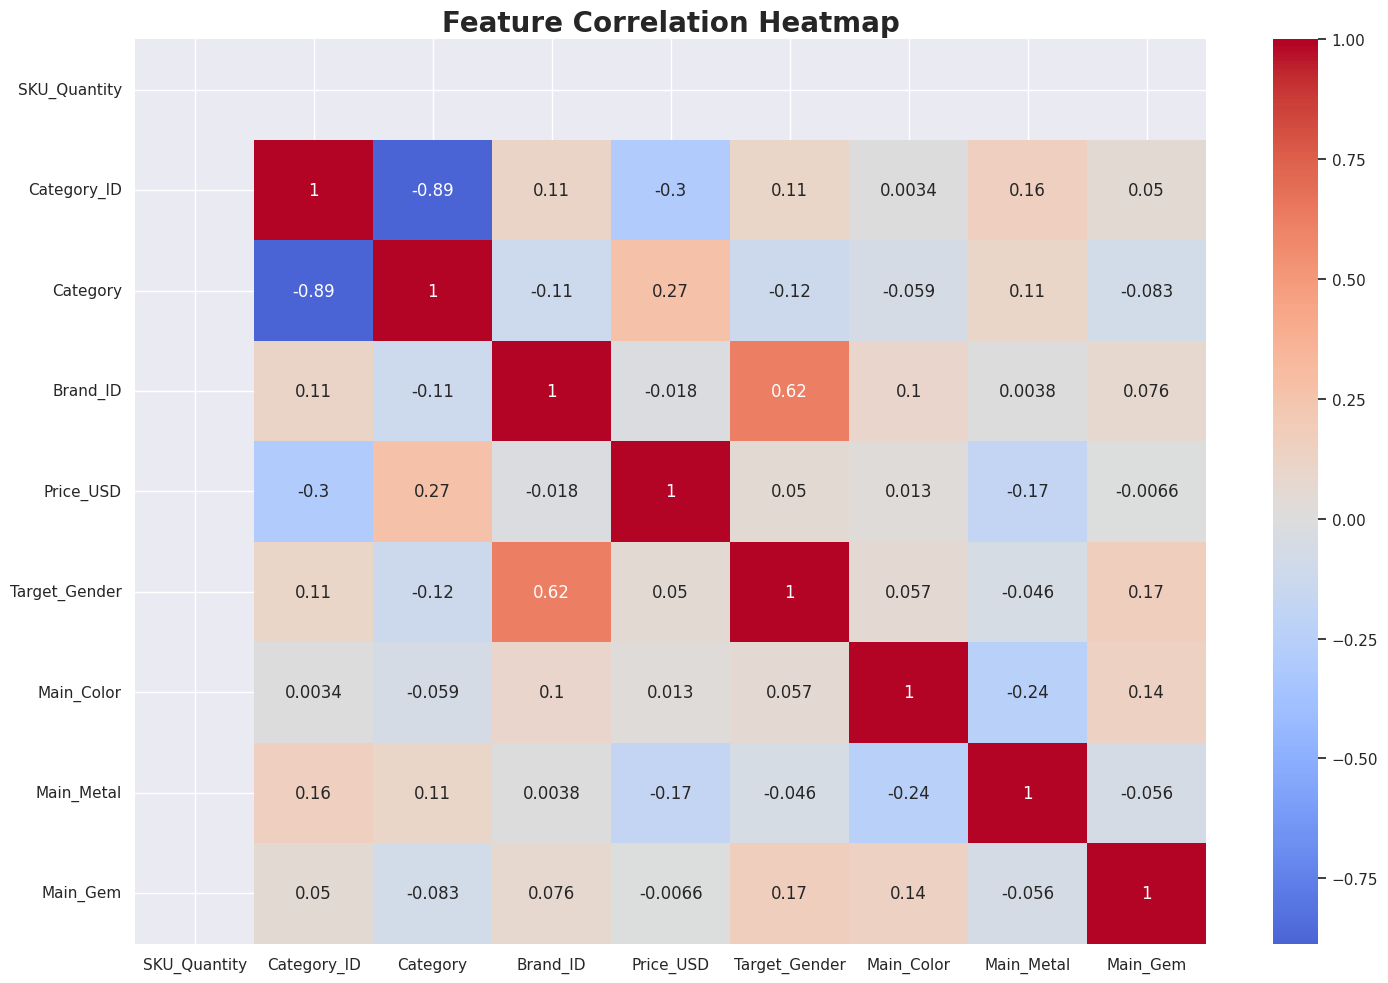

In [126]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, center = 0, cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap", fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show(); plt.close()

The correlation plot, shows a weak to moderate correlations.

hence lets set correlation limit

In [127]:
# Set correlations limits
upper = 1
lower = .2

In [128]:
#correlated_columns = np.where(np.abs(correlations) > upper, correlations, 0)
#correlated_columns

correlated_columns = {
    columns: correlations[(correlations[columns] > lower) & (correlations[columns] < upper)].index.tolist()
    for columns in correlations.columns
}
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

### **Insights to help inform next actions**

From  the findings we can observe the following:

1. __Missing values__: There are alot of missing values in the dataset, this can be fixed either by value imputation or encoding missing values

2. __Data Corruption__: Variables such as `jewelry_category` contain corrupt(meaningless) values, this is the reason for high degree of missing values in the entire dataset.

3. __Rare values__: Some features have some values that occur rarely. A prime instance of this, is the `Target_Gender` column, where `male gender` is rarely represented , often this can be seen as data issues, on other instances, this shows the true reflection of the distributions within the sampled dataset.

4. __Low Cardinality/Feature invariance__: The `SKU_Quantity` feature is the only feature with one (1) unique value it provide no information.

5. __Target Skew__: The target variable is highly right skewed. This can lead to issues during machine learning training. Hence the issue should be fixed.

6. __Correlation__: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence. However, the target variable (`Price_USD`) exhibits a low correlation with the independent variables.

##**Data Preparation for Machine Learning**
Based on the **Data Implication** ealier discovered, We are carrying out the following experiments:
1. __Missing Values__: Using the SimpleImputer, an algorithmic method, Allowing filling/replacing missing values with eith or median or mean of a feature.

2. __Feature Encoding__: All Categorical features to be used will be encoded i.e Target Gender, Main Gems.

3. __Redundant Features__: Features such as:
     A. SKU_Quantity: Due to feature invariance
     B. Order_ID: Its a simple identifier for orders, it has no influence on jewelry price.
     C. Product_ID: Its a product identifier
     D. Order_Datetime: To avoid data leakage

4. __Target Skew__:The target variable is strongly right-skewed. This can be an issue when learning a mapping from the data space to label space. This issue will be fixed using **`TransformedTargetRegressor`** utility.

**Note:** Most data preparation steps will be implemented using **`Pipeline`** class from *`Sci-kit learn`*. The Pipeline Object allows a chain of transformers and estimators sequentially for use as one composite object.

The steps:
1. Eliminate less useful features
2. Extract records with actual categories
3. Encode categorical features(if required)
4. Account for target skew
5. Fix missing values

In [129]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [130]:
data.columns

Index(['Order_datetime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category', 'Brand_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

##**Feature Engineering**

In [131]:
# Create additional features
data['Order Month'] = pd.to_datetime(data['Order_datetime']).dt.month
data['Order Day'] = pd.to_datetime(data['Order_datetime']).dt.day

In [132]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order Month,Order Day
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN,12,1
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire,12,2
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond,12,2
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst,12,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN,12,2


In [133]:
# columns to eliminate
columns_to_eliminate = [
    'SKU_Quantity',
    'Order_ID',
    'Product_ID',
    'Order_datetime',
    'Category_ID',
    'User_ID'
]

In [134]:
# Eliminate less useful features
#real_categories = real_categories.drop(labels = ['SKU_Quantity', 'Order_ID', 'Product_ID', 'Order_datetime', 'Category_ID', 'User_ID'], axis = 1)
#real_categories.head()
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order Month,Order Day
0,NaN,NaN,212.14,NaN,yellow,gold,NaN,12,1
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire,12,2
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond,12,2
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst,12,2
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN,12,2


In [135]:
data.columns

Index(['Category', 'Brand_ID', 'Price_USD', 'Target_Gender', 'Main_Color',
       'Main_Metal', 'Main_Gem', 'Order Month', 'Order Day'],
      dtype='object')

In [136]:
# Standardization
scaler = StandardScaler()
scaled_features = ['Brand_ID', 'Price_USD', 'Order Month', 'Order Day']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

In [137]:
data.shape

(95910, 9)

In [138]:
# Eliminate wrong Categories
data = data.loc[data["Category"].isin(categories)]

In [139]:
data.shape

(80458, 9)

In [140]:
# Seperate features from labels
X = data.drop(labels = ['Price_USD'], axis = 1)
y = data['Price_USD']

In [141]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=42)

In [142]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order Month,Order Day
91909,jewelry.bracelet,-0.249774,NaN,red,gold,NaN,1.058029,0.728811
37131,jewelry.earring,-0.249774,NaN,red,gold,fianit,1.348435,0.956736
2746,jewelry.ring,-0.249774,NaN,red,gold,NaN,-0.974810,1.184660
9747,jewelry.ring,-0.249774,f,white,gold,diamond,1.058029,1.184660
64662,jewelry.earring,-0.249774,f,white,gold,diamond,-0.103593,-0.524774


In [143]:
y_train.head()

,Price_USD
91909,-0.348263
37131,-0.599932
2746,-0.545852
9747,-0.476552
64662,0.340752


## **Model Development**

1. Linear Regression
2. Extremely Random Forest(ExtraTrees)
3. Adaptive Boosting(Adaboost), and
4. Catboost

i.   Encode categorical features

ii.  Account for target skew

iii. Fix Missing values


In [144]:
# Customize pipeline
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):

  #Fill misssing Values; where needed
  first_transformer = ColumnTransformer(
      transformers=[
          ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices
  )
      ],
      remainder = "passthrough",
      sparse_threshold = 0.
  )

  #One hot Encode where needed
  second_transformer = ColumnTransformer(
      transformers=[
          ("one_hot", OneHotEncoder(), categorical_indices)
      ],
      remainder = "passthrough",
      sparse_threshold = 0.
  )

  # Label encode, where needed
  third_transformer = ColumnTransformer(
      transformers=[
          ("ordinal", OrdinalEncoder(), categorical_indices)
      ],
      remainder = "passthrough",
      sparse_threshold = 0.
  )

  steps = []

  if fill_missing:
    steps.append(("first_transformer", first_transformer))

  if one_hot:
    steps.append(("second_transformer", second_transformer))

  if label_encode:
    steps.append(("third_transformer", third_transformer))

  model_pipeline = Pipeline(steps = steps + [("model", model)])

  steps.append(("model", model))

  return model_pipeline

In [145]:
# Categorical Features are:
X.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order Month,Order Day
1,jewelry.pendant,-0.249774,f,white,gold,sapphire,1.348435,-1.664397
2,jewelry.pendant,-0.249774,f,red,gold,diamond,1.348435,-1.664397
3,jewelry.necklace,-0.249774,NaN,red,gold,amethyst,1.348435,-1.664397
4,jewelry.earring,-0.249774,NaN,red,gold,NaN,1.348435,-1.664397
5,jewelry.earring,-0.249774,NaN,red,gold,diamond,1.348435,-1.664397


In [146]:
# Generate the indices

#Convert Column to list
columns = X.columns.tolist()

#Get the column indices
column_indices = [columns.index(x) for x in columns]

#Get the categorical features
categorical_features = [x for x in columns if x not in ['Brand_ID']]
categorical_indices = [columns.index(x) for x in categorical_features]

In [147]:
column_indices

[0, 1, 2, 3, 4, 5, 6, 7]

In [148]:
categorical_indices

[0, 2, 3, 4, 5, 6, 7]

In [149]:
random_state=42
models ={
    "catboost_pipeline": generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 1000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False,
    one_hot = False,
    label_encode = True
),
    "linear_regression_pipeline": generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
),
    "adaboost_pipeline": generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 100, learning_rate =.1),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
),
    "extra_trees_pipeline": generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 100, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
),
    "decision_tree_pipeline": generate_pipeline(
    DecisionTreeRegressor(),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
),
    "random_forest_pipeline": generate_pipeline(
    RandomForestRegressor(n_estimators=100),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
)
}

In [150]:
# Transform targets using Yeo-Johnson
random_state=42
catboost_pipeline = TransformedTargetRegressor(regressor=models["catboost_pipeline"], transformer=PowerTransformer(method="yeo-johnson"))
linear_regression_pipeline = TransformedTargetRegressor(regressor=models["linear_regression_pipeline"], transformer=PowerTransformer(method="yeo-johnson"))
adaboost_pipeline = TransformedTargetRegressor(regressor=models["adaboost_pipeline"], transformer=PowerTransformer(method="yeo-johnson"))
extra_trees_pipeline = TransformedTargetRegressor(regressor=models["extra_trees_pipeline"], transformer=PowerTransformer(method="yeo-johnson"))
decision_tree_pipeline = TransformedTargetRegressor(regressor=models["decision_tree_pipeline"], transformer=PowerTransformer(method="yeo-johnson"))


In [151]:
# Update models with transformed target regressors
models.update({
    "catboost_pipeline": catboost_pipeline,
    "linear_regression_pipeline": linear_regression_pipeline,
    "adaboost_pipeline": adaboost_pipeline,
    "extra_trees_pipeline": extra_trees_pipeline,
    "decision_tree_pipeline": decision_tree_pipeline,
})

**Model Training & Cross-Validation**

In [152]:
random_state=42
def evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Evaluates a dictionary of models using cross-validation and calculates various metrics.

    Args:
        models: A dictionary where keys are model names and values are sklearn pipeline objects.
        X_train: Training features.
        y_train: Training target.
        X_test: Test features.
        y_test: Test target.

    Returns:
        A pandas DataFrame containing the evaluation results.
    """

    results = {}

    for name, generate_pipeline in tqdm(models.items(), desc="Evaluating Models"):
        try:
            scores = cross_val_score(generate_pipeline, X_train, y_train, cv=5, scoring="r2")
            generate_pipeline.fit(X_train, y_train)
            y_pred = generate_pipeline.predict(X_test)

            results[name] = {
                "Mean CV R² Score": scores.mean(),
                "Test R² Score": r2_score(y_test, y_pred),
                "MAE": mean_absolute_error(y_test, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
            }

        except Exception as e:
            print(f"Error evaluating model '{name}': {e}")
            results[name] = {
                "Mean CV R² Score": np.nan,
                "Test R² Score": np.nan,
                "MAE": np.nan,
                "RMSE": np.nan
            }

    results_df = pd.DataFrame(results).T
    return results_df

# Example usage:
# Assuming you have a dictionary of models named 'models'
results_df = evaluate_models(models, X_train, y_train, X_test, y_test)
results_df.head()
# results_df.to_csv("model_evaluation_results.csv", index=True)

Evaluating Models:   0%|          | 0/6 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
0:	learn: 0.9578902	total: 10.2ms	remaining: 10.2s
1:	learn: 0.9280333	total: 18.4ms	remaining: 9.2s
2:	learn: 0.9020546	total: 26.5ms	remaining: 8.81s
3:	learn: 0.8752257	total: 35.3ms	remaining: 8.78s
4:	learn: 0.8571544	total: 43.2ms	remaining: 8.59s
5:	learn: 0.8362233	total: 51.4ms	remaining: 8.51s
6:	learn: 0.8227523	total: 59.9ms	remaining: 8.5s
7:	learn: 0.8079553	total: 68.4ms	remaining: 8.48s
8:	learn: 0.7973507	total: 77.3ms	remaining: 8.51s
9:	learn: 0.7855923	total: 100ms	remaining: 9.91s
10:	learn: 0.7777569	total: 108ms	remaining: 9.71s
11:	learn: 0.7689809	total: 116ms	remaining: 9.55s
12:	learn: 0.7604394	total: 125ms	remaining: 9.47s
13:	learn: 0.7555194	total: 133ms	remaining: 9.37s
14:	learn: 0.7494701	total: 142ms	remaining: 9.29s
15:	learn: 0.7444690	total: 150ms	remaining: 9.2s
16:	learn: 0.7410930	total: 160ms	remaining: 9.25s
17:	learn: 0.7370151	total: 168ms	remaining: 9.16s
18:	learn: 0.7344118	total: 176ms	r

Evaluating Models: 100%|██████████| 6/6 [22:10<00:00, 221.79s/it]


,Mean CV R² Score,Test R² Score,MAE,RMSE
catboost_pipeline,0.207014,0.215004,0.333268,0.931407
linear_regression_pipeline,0.060719,0.054778,0.399492,1.022051
adaboost_pipeline,0.038934,0.035473,0.417230,1.032436
extra_trees_pipeline,0.094122,0.129381,0.394131,0.980889
decision_tree_pipeline,-0.165301,0.405431,0.402573,0.810601


From the evaluated model results, The better of all models is ....

Hence we will Carryout Hyperparameter tuning on ...

##**Hyperparameter Tuning (GridSearchCV)**


In [154]:
# Define the parameter grid for hyperparameter tuning
random_state=42
param_grid = {
    'regressor__model__max_depth': [None, 5, 10, 15],  # Change to 'regressor__model__max_depth'
    'regressor__model__min_samples_split': [2, 5, 10], # Change to 'regressor__model__min_samples_split'
    'regressor__model__min_samples_leaf': [1, 2, 4]  # Change to 'regressor__model__min_samples_leaf'
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree_pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'regressor__model__max_depth': 15, 'regressor__model__min_samples_leaf': 4, 'regressor__model__min_samples_split': 2}


In [155]:
# Create a new pipeline with the best hyperparameters
# Extract the relevant parameters for DecisionTreeRegressor
random_state=42
tree_params = {k.split('__')[-1]: v for k, v in best_params.items() if k.startswith('regressor__model__')}

best_decision_tree_pipeline = generate_pipeline(
    DecisionTreeRegressor(**tree_params),  # Pass the extracted parameters
    column_indices,
    categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode=False
)

In [156]:
# Fit the model with the best hyperparameters
best_decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('first_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('second_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 4, 5, 6, 7])])),
                ('model',
                 DecisionTreeRegressor(max_depth=15, min_samples_leaf=4))])

In [157]:
# Evaluate the model with the best hyperparameters
random_state=42
y_pred = best_decision_tree_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.2836899266309081
Mean Absolute Error: 0.4257702533515035
Root Mean Squared Error: 0.8897263288615957


###**Model Explainability**
**Feature Importance**

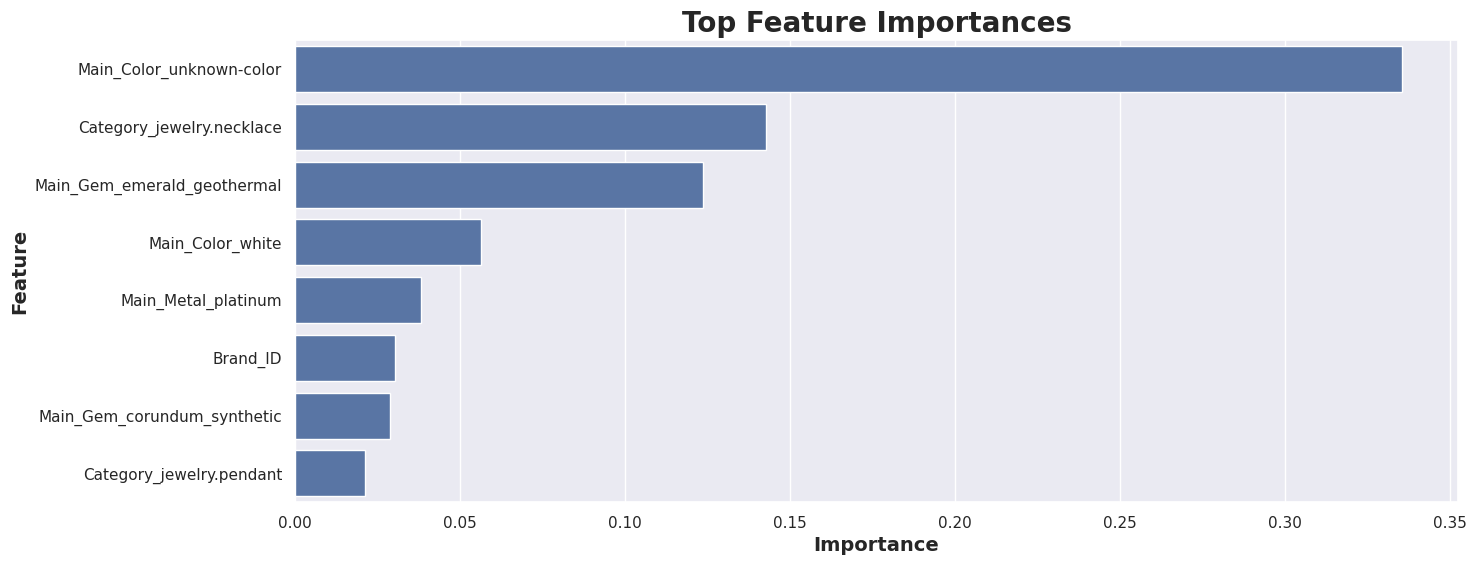

In [158]:
# Get feature importances
importances = best_decision_tree_pipeline.named_steps['model'].feature_importances_

# Get feature names after transformations
# This assumes your pipeline has a step named 'second_transformer'
# which is a ColumnTransformer with a OneHotEncoder
onehot_columns = best_decision_tree_pipeline.named_steps['second_transformer'].named_transformers_['one_hot'].get_feature_names_out(input_features=X_train.columns[categorical_indices])

# Combine the one-hot encoded features with the remaining features
all_feature_names = np.concatenate([X_train.columns[~np.isin(np.arange(len(X_train.columns)), categorical_indices)], onehot_columns])

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})

# Sort by importance and select top 8 features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(8)

# Visualize feature importance
plt.figure(figsize=(15, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top Feature Importances', fontsize = 20, fontweight = "bold")
plt.xlabel('Importance', fontsize = 14, fontweight = "bold")
plt.ylabel('Feature', fontsize = 14, fontweight = "bold")
plt.show()

**Findings:**

- __Target gender, Category, Main Gem, and Main Metal__ are the most important factors affecting price.
- __Brand ID and Color__ have a lesser impact.

##**Experiment Tracking with MLflow**

In [ ]:
# !ngrok authtoken 2sKnZBNfjA7FoSJjHD1Pfohig4R_6yqZ3hyc7oJFrqyxBRdc8

In [ ]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

# Start the MLflow UI server
subprocess.Popen(['mlflow', 'ui', '--backend-store-uri', 'sqlite:///mlflow.db'])

# Set the tracking URI to the SQLite database
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# Create an MLflow Experiment
mlflow.set_experiment("Jewelry_Price_Optimization")

# Get ngrok authtoken from the user
print("Enter your ngrok authtoken:")
conf.get_default().auth_token = getpass.getpass()

# Start the ngrok tunnel
port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"https://127.0.0.1:{port}\"')

# Log the model and its parameters
with mlflow.start_run():
    mlflow.log_params(best_params)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)

    # Log feature importances
    for feature, importance in zip(X_train.columns, importances):
        mlflow.log_param(f"feature_importance_{feature}", importance)

    # Log the model artifact
    mlflow.sklearn.log_model(best_decision_tree_pipeline, "decision_tree_model")
print("Model successfully logged in MLflow.")

## **Model Deployment**
As observed from the Model Evaluation phase, although the CatBoost pipeline performed best amongst all models, its scores were still quite bad(R2 score = 0.32).

A report will need to be written and a presentation be made to the executive team 'Gemineye Emporium`, detailing tangible reasons and hypothesis for this.



**Save the Model for Future Use**

In [159]:
%cd /content/drive/MyDrive/Colab Notebooks/Amdari_Work_Exp_Internship_Cohort/Jewellery_Price_Optimization_with_ML-Pricing-Data-to-Refine-Pricing-Strategies

/content/drive/MyDrive/Colab Notebooks/Amdari_Work_Exp_Internship_Cohort/Jewellery_Price_Optimization_with_ML-Pricing-Data-to-Refine-Pricing-Strategies


In [160]:
# Current Directory
!pwd

/content/drive/MyDrive/Colab Notebooks/Amdari_Work_Exp_Internship_Cohort/Jewellery_Price_Optimization_with_ML-Pricing-Data-to-Refine-Pricing-Strategies


In [161]:
%ls

 app.py                        'Jewelry Price Optimization Using Machine Learning.ipynb'
 catboost_info/                 README.md
 Jewelry_Data_Dictionary.xlsx   requirements.txt
 Jewelry_Dataset.csv            utils.py
 jewelry_price_model.pkl


In [162]:
import pickle

# Save trained model and scaler
# Assuming 'best_decision_tree_pipeline' is your trained model
with open("jewelry_price_model.pkl", "wb") as model_file:
    pickle.dump(best_decision_tree_pipeline, model_file) # Changed 'model' to 'best_decision_tree_pipeline'

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [163]:
%ls

 app.py                        'Jewelry Price Optimization Using Machine Learning.ipynb'
 catboost_info/                 README.md
 Jewelry_Data_Dictionary.xlsx   requirements.txt
 Jewelry_Dataset.csv            scaler.pkl
 jewelry_price_model.pkl        utils.py


**Load & Use the Model for Predictions**

In [ ]:
# Load the model
with open("jewelry_price_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Predict new jewelry price
new_sample = np.array([[3, 1, 2, 5]])  # Example input
scaled_sample = scaler.transform(new_sample)
predicted_price = loaded_model.predict(scaled_sample)
print(f"Predicted Jewelry Price: ${predicted_price[0]:.2f}")

##**Insights & Recommendations**


**Key Takeaways:**

Feature Importance: Price is influenced by material, brand, and order date.
Best Model: Random Forest achieved the best R² score.
Optimized Pricing: AI-driven insights allow dynamic price adjustments.
Business Strategy: The company can optimize revenue while maintaining affordability.

**Recommendations**

The following Recommendations are proposed:

They include:

- Gemineye Emporium to get means of providing better, and more cleaner dataset as most datasets was corrupt.
- Get more larger dataset spectrum features of dataset, more diversified dataset.

##**Conclusion**
- Machine Learning successfully predicts jewelry prices based on product attributes.
- Key features influencing price include Category, Main Gem, and Metal.
- The trained model is deployed to automate pricing at Gemineye Emporium.


This project provides data-driven pricing strategies to help `Gemineye Emporium` maximize profitability while staying competitive.

  - Enhanced jewelry price prediction model
  - Experiment tracking with MLflow
  - Improved model performance with hyperparameter tuning
  - Interactive deployment via Streamlit

This project provides data-driven pricing strategies to help Gemineye Emporium maximize profitability while staying competitive.